<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [ ]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
458,4237-CLSMM,Male,0,Yes,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,38,No
6563,6906-ANDWJ,Male,0,Yes,Yes,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.90,1107.25,Yes
4576,3181-MIZBN,Male,0,Yes,Yes,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,313.4,No
5318,2498-XLDZR,Female,0,Yes,Yes,32,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,73.60,2316.85,No
6351,1842-EZJMK,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.70,5071.05,Yes


**First of all, drop customerID column as it is of no use**

In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Ahh... it is string. Lets convert it to numbers**

In [ ]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

**Hmmm... some values seems to be not numbers but blank string. Let's find out such rows**

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.iloc[488].TotalCharges

' '

In [ ]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [ ]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


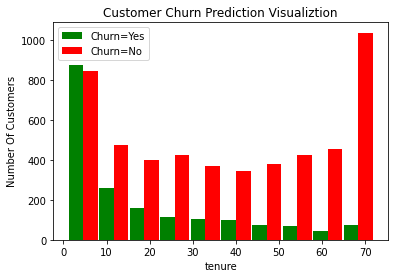

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


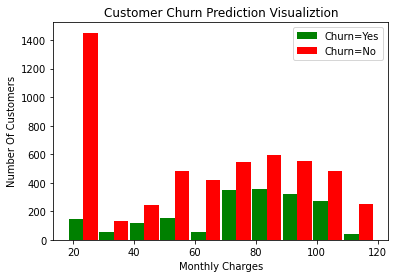

In [ ]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [ ]:
def print_unique_col_values(df):
       for column in df.columns:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
for col in df1.columns:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1640,1,0,1,1,7,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6954,0,0,0,0,15,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2437,1,0,0,0,7,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4436,1,0,0,1,19,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
136,1,0,0,0,23,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5158 - accuracy: 0.7292
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7902
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7970
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.7956
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.7986
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8027
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8039
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8032
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8087
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4055 - accura

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.7754


[0.4931727349758148, 0.7754086852073669]

In [ ]:
y_pred = model.predict(X_test)


44/44 [==============================] - 0s 2ms/step


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
y_pred_final = []
for element in y_pred:
    if element > 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [ ]:
y_pred[:10]

[]

In [ ]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       999
           1       0.64      0.42      0.50       408

    accuracy                           0.76      1407
   macro avg       0.72      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



In [ ]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
### Mitigating skewness of data

In [ ]:
# Method 1:Undersampling

In [ ]:
count_class_0,count_class_1=df2.Churn.value_counts()

In [ ]:
count_class_0,count_class_1

(5163, 1869)

In [ ]:
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [ ]:
df_class_0.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5268,0,0,1,1,0.957746,1,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0
883,1,0,1,0,0.929577,1,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
5352,0,0,0,0,0.352113,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4498,1,0,1,1,0.140845,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3952,1,0,0,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
2532,1,1,0,0,0.563380,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
676,1,0,0,0,0.661972,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3391,0,0,0,0,0.042254,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5524,0,0,1,1,0.619718,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
4318,0,0,0,0,0.774648,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0_under=df_class_0.sample(count_class_1)

In [ ]:
df_class_0_under.Churn.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_final_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_final_under.shape

(3738, 27)

In [ ]:
df_final_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [ ]:
X=df_final_under.drop("Churn",axis=1)
y=df_final_under['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100,stratify=y)

In [ ]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [ ]:
def ANN(X_train,y_train,X_test,y_test,loss):
  model = keras.Sequential([
      keras.layers.Dense(26, input_shape=(26,), activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
      ])
  model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=100)
  print(model.evaluate(X_test,y_test))
  y_preds=model.predict(X_test)
  y_preds=np.round(y_preds)
  print("Classification report:\n",classification_report(y_test,y_preds))
  return y_preds

  

In [ ]:
y_preds=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6264 - accuracy: 0.6515
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7542
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7712
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7742
Epoch 11/

In [ ]:
##oversampling

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [ ]:
df_class_1_over.shape

(5163, 27)

In [ ]:
df_final_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_final_over.shape

(10326, 27)

In [ ]:
X=df_final_over.drop("Churn",axis=1)
y=df_final_over['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100,stratify=y)

In [ ]:
y_preds=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5560 - accuracy: 0.7146
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4841 - accuracy: 0.7690
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.7718
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4726 - accuracy: 0.7736
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4700 - accuracy: 0.7749
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7738
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4655 - accuracy: 0.7755
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.7766
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.7760
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4599 - accura

In [ ]:
##Method 3
##SMOTE
#pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X=df2.drop("Churn",axis=1)
y=df2["Churn"]

In [ ]:
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(X,y)

In [ ]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=.2,random_state=100,stratify=y_sm)

In [ ]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [ ]:
y_preds=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7300
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7752
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4573 - accuracy: 0.7837
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4514 - accuracy: 0.7834
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.7844
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4435 - accuracy: 0.7863
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.7903
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4377 - accuracy: 0.7925
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.7948
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4309 - accura

In [ ]:
##4. use of ensemble with undersampling

In [ ]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
X=df2.drop('Churn',axis=1)
y=df2['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100,stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
##0===4130
#1=1869
model1-----class1(1495)+class0(0,1495)
model2-----class1(1495)+class0(1496,1495+1495)
model3-----class1(1495)+class0(2990,4130)

In [ ]:
df3=X_train.copy()
df3['Churn']=y_train
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1827,1,0,1,1,0.619718,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
6134,0,1,0,0,0.070423,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1885,0,0,1,1,0.323944,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
2835,1,1,0,0,0.915493,1,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0
1183,1,0,1,0,0.732394,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
df3_class0=df3[df3['Churn']==0]

In [ ]:
df3_class1=df3[df3['Churn']==1]

In [ ]:
def get_train_batch(df_major,df_minor,start,end):
  df_train=pd.concat([df_major[start:end],df_minor],axis=0)
  X_train=df_train.drop('Churn',axis=1)
  y_train=df_train["Churn"]
  return X_train,y_train

In [ ]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8890
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 6.2588e-04 - accuracy: 1.0000
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 4.1998e-04 - accuracy: 1.0000
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 2.9810e-04 - accuracy: 1.0000
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 2.2049e-04 - accuracy: 1.0000
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 1.6834e-04 - accura

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/100
47/47 [==============================] - 1s 3ms/step - loss: 0.2356 - accuracy: 0.9973
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 1.0000
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 9.5235e-04 - accuracy: 1.0000
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 5.9554e-04 - accuracy: 1.0000
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 3.9915e-04 - accuracy: 1.0000
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 2.8414e-04 - accuracy: 1.0000
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 2.1195e-04 - accura

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/100
47/47 [==============================] - 1s 4ms/step - loss: 0.3467 - accuracy: 0.9793
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 1.0000
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 7.4235e-04 - accuracy: 1.0000
Epoch

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
len(y_pred1)

1407

In [ ]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
  n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
  if n_ones>1:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0


In [ ]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1033
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1407
   macro avg       0.13      0.50      0.21      1407
weighted avg       0.07      0.27      0.11      1407



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
